In [10]:
import ROOT
from ROOT import TF1, TCanvas, TPad, TGraph
from ROOT.TMath import Sin, Cos

In [11]:
def func_pt(pt, Ee, Ep):
    const_pt = TGraph()
    const_pt.SetLineColor(2)
    
    s = 4 * Ee * Ep
    q2 = pt ** 2
    
    for i in range(100000):
        q2 += 0.0001 * q2
        x = (q2 / s) / (1 - ((pt ** 2) / q2))
        
        const_pt.SetPoint(i, x, q2)
        
        if q2 > 1e+4:
            break
    
    return const_pt

def func_Epz(xx, par):
    x = xx[0]
    Epz = par[0]
    
    Ee = par[1]
    Ep = par[2]
    s = 4 * Ee * Ep
    
    y = Epz / (2 * Ee)
    
    return s * y * x

def func_F(xx, par):
    x = xx[0]
    F = par[0]
    
    Ee = par[1]
    Ep = par[2]
    s = 4 * Ee * Ep
    
    num = s * x * (1 - (F / (Ep * x)))
    den = (Ee / (Ep * x)) - 1
    
    return num/den if num/den < s * x else s * x

def func_gamma(xx, par):
    x = xx[0]
    gamma = par[0] * 3.1415926 / 180
    
    Ee = par[1]
    Ep = par[2]
    s = 4 * Ee * Ep
    
    a = 4 * Ee ** 2 * (Sin(gamma)) ** 2
    b = 1 / (s * x)
    c = (s * x * (1 - Cos(gamma))) ** 2
    q2 = 1 / ((a/c) + b)
    
    return q2 if (0 < q2 and q2 < s * x) else s * x

In [12]:
def generic_jacquet_blondel(Ee, Ep):
    funcs = []
    
    pts = [1, 2, 4, 10, 20]
    
    const_Epz = TF1('x vs. Q^2 for constant E-pz', func_Epz, 1e-5, 1, 3)
    const_Epz.SetParameter(1, Ee)
    const_Epz.SetParameter(2, Ep)
    const_Epz.SetLineColor(3)
    const_Epz.SetNpx(10000)
    Epzs = [0.01, 0.1, 1, 10, 2 * Ee, 20]
    if 2 * Ee < 20:
        Epzs[5] = 0
        
    const_F = TF1('x vs. Q^2 for constant F', func_F, 1e-5, 1, 3)
    const_F.SetParameter(1, Ee)
    const_F.SetParameter(2, Ep)
    const_F.SetLineColor(4)
    const_F.SetNpx(10000)
    Fs = [1, 5, 10, 20, 40, 100]
    
    const_gamma = TF1('x vs. Q^2 for constant gamma', func_gamma, 1e-5, 1, 3)
    const_gamma.SetParameter(1, Ee)
    const_gamma.SetParameter(2, Ep)
    const_gamma.SetFillStyle(1001)
    const_gamma.SetNpx(10000)
    gammas = [176, 147, 33, 4]
    gamma_colors = [38, 41, 30, 40]
    
    for i in range(len(gammas)):
        const_gamma.SetParameter(0, gammas[i])
        const_gamma.SetLineColor(gamma_colors[i])
        const_gamma.SetFillColor(gamma_colors[i])
        funcs.append(const_gamma.Clone('gamma='+str(gammas[i])))
        
    for i in range(len(Fs)):
        const_F.SetParameter(0, Fs[i])
        funcs.append(const_F.Clone('F='+str(Fs[i])))
    
    for i in range(len(pts)):
        funcs.append(func_pt(pts[i], Ee, Ep))
        
    for i in range(len(Epzs)):
        const_Epz.SetParameter(0, Epzs[i])
        funcs.append(const_Epz.Clone('E-pz='+str(Epzs[i])))
        
    return funcs

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c10x100


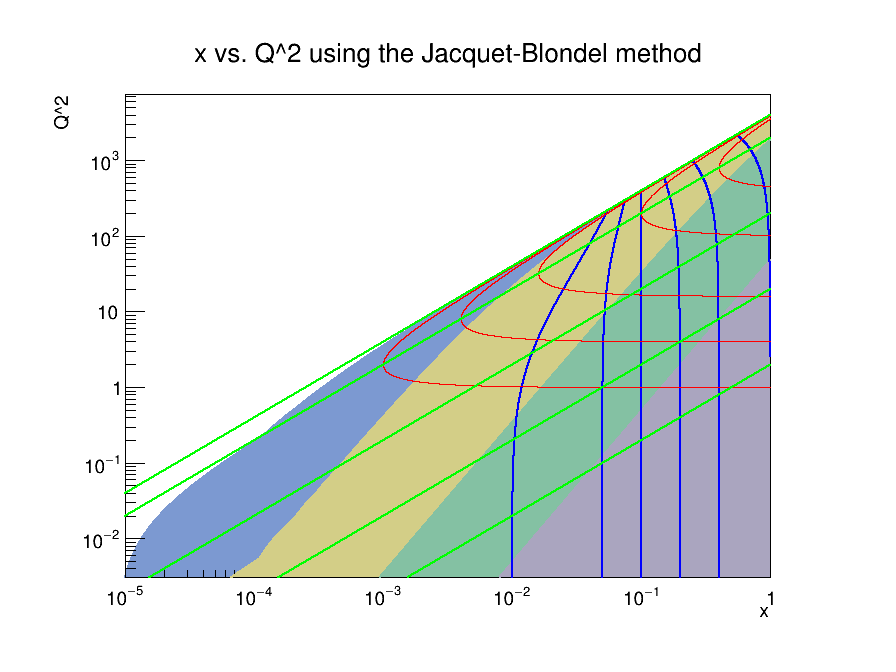

In [15]:
c1 = TCanvas('c10x100', 'Canvas containing x vs. Q^2', 10, 10, 900, 700)

pad1 = TPad('pad10x100', 'Pad containing x vs. Q^2', 0.05, 0.05, 0.95, 0.95)
pad1.Draw()
pad1.cd()
pad1.SetLogx()
pad1.SetLogy()

funcs10x100 = generic_jacquet_blondel(10, 100)
for i in range(len(funcs10x100)):
    graphtype = '' if i == 0 else 'SAME'
    funcs10x100[i].SetTitle('x vs. Q^2 using the Jacquet-Blondel method; x; Q^2')
    funcs10x100[i].Draw(graphtype)
    
c1.Update()
c1.Draw()